In [582]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [583]:
import chardet
with open('attacks.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [584]:
shark_attacks = pd.read_csv('attacks.csv',encoding='Windows-1252')
shark_attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [585]:
#STEPS TO CLEAN THE DATA:

#1. Drop the columns I'm not going to use
print(shark_attacks.columns.values)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source' 'pdf' 'href formula' 'href' 'Case Number.1'
 'Case Number.2' 'original order' 'Unnamed: 22' 'Unnamed: 23']


In [586]:
to_drop = ['Name','href formula','href','Unnamed: 22','Unnamed: 23','Type','original order','pdf','Time','Location','Injury']
shark_attacks.drop(to_drop, inplace=True, axis=1)


In [587]:
#We want to drop more columns, but in a clever way, if we keep looking, you can see several columns give the 
#same information, eg: case number, date,year, case number1, case number2.
#We want to keep just one of them, to do that we are going to check wich one has less NaN

In [588]:
shark_attacks.isnull().sum()
#From here, we extract the number of values from each column:
#case number = 17021, 
#date = 19421
#year = 19423
#case number1 == case number2 == 19421
#The cleanest one is year hence why I decide to keep that one

Case Number               17021
Date                      19421
Year                      19423
Country                   19471
Area                      19876
Activity                  19965
Sex                       19986
Age                       22252
Fatal (Y/N)               19960
Species                   22259
Investigator or Source    19438
Case Number.1             19421
Case Number.2             19421
dtype: int64

In [589]:
to_drop = ['Date','Case Number','Case Number.1','Case Number.2']
shark_attacks.drop(to_drop, inplace=True, axis=1)
shark_attacks.head()

,Year,Country,Area,Activity,Sex,Age,Fatal (Y/N),Species,Investigator or Source
0,2018.0,USA,California,Paddling,F,57,N,White shark,"R. Collier, GSAF"
1,2018.0,USA,Georgia,Standing,F,11,N,NaN,"K.McMurray, TrackingSharks.com"
2,2018.0,USA,Hawaii,Surfing,M,48,N,NaN,"K.McMurray, TrackingSharks.com"
3,2018.0,AUSTRALIA,New South Wales,Surfing,M,NaN,N,2 m shark,"B. Myatt, GSAF"
4,2018.0,MEXICO,Colima,Free diving,M,NaN,N,"Tiger shark, 3m",A .Kipper


In [590]:
#2. Once the columns we no longer need are dropped, we check for duplicates and null values in the 
#remaining columns

shark_attacks.drop_duplicates(inplace=True)
shark_attacks.head()

,Year,Country,Area,Activity,Sex,Age,Fatal (Y/N),Species,Investigator or Source
0,2018.0,USA,California,Paddling,F,57,N,White shark,"R. Collier, GSAF"
1,2018.0,USA,Georgia,Standing,F,11,N,NaN,"K.McMurray, TrackingSharks.com"
2,2018.0,USA,Hawaii,Surfing,M,48,N,NaN,"K.McMurray, TrackingSharks.com"
3,2018.0,AUSTRALIA,New South Wales,Surfing,M,NaN,N,2 m shark,"B. Myatt, GSAF"
4,2018.0,MEXICO,Colima,Free diving,M,NaN,N,"Tiger shark, 3m",A .Kipper


In [591]:
shark_attacks.isnull().sum() #displays  the nulls
#From this, we can see a lot of values are null.

Year                         3
Country                     50
Area                       450
Activity                   539
Sex                        562
Age                       2803
Fatal (Y/N)                540
Species                   2814
Investigator or Source      18
dtype: int64

In [592]:
#Therefore, I decide to drop all the rows in wich ALL the elements are null
shark_attacks.dropna(how = 'all', inplace = True)
shark_attacks.tail() #Doing this we see we now have 8703 rows, therefore we have almost dropped 2/3 
#of the data we initially had

,Year,Country,Area,Activity,Sex,Age,Fatal (Y/N),Species,Investigator or Source
6297,0.0,AUSTRALIA,Western Australia,Diving,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,0.0,AUSTRALIA,Western Australia,Pearl diving,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,0.0,USA,North Carolina,Swimming,M,NaN,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,0.0,PANAMA,NaN,NaN,M,NaN,Y,NaN,"The Sun, 10/20/1938"
6301,0.0,CEYLON (SRI LANKA),Eastern Province,Swimming,M,15,Y,NaN,S.W. Baker


In [593]:
#As we can see, there are still a lot of columns that have values that cant be used, to get rid of these, but avoid 
#dropping useful info at the same time, we do this:

#Get rid of the row if more than 13 of the values from each column is Null
shark_attacks_new = shark_attacks[shark_attacks.isnull().sum(axis=1) < 13]
shark_attacks_new.tail()

,Year,Country,Area,Activity,Sex,Age,Fatal (Y/N),Species,Investigator or Source
6297,0.0,AUSTRALIA,Western Australia,Diving,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,0.0,AUSTRALIA,Western Australia,Pearl diving,M,NaN,Y,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,0.0,USA,North Carolina,Swimming,M,NaN,Y,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,0.0,PANAMA,NaN,NaN,M,NaN,Y,NaN,"The Sun, 10/20/1938"
6301,0.0,CEYLON (SRI LANKA),Eastern Province,Swimming,M,15,Y,NaN,S.W. Baker


In [594]:
#We are now going to start to create our first comparations
## We want to check the top 5 countries where most shark attacks take place

In [595]:
#This column might have data wich is not following the same structure, but if we focuss on the bigger picture
#those values would never sum to be as big as the top3, so we are going to omit them,
#And create variables that only include the top values

top_countries = shark_attacks_new['Country'].value_counts().head(5)
top_countries

USA                 2219
AUSTRALIA           1330
SOUTH AFRICA         578
PAPUA NEW GUINEA     134
NEW ZEALAND          127
Name: Country, dtype: int64

In [596]:
top_years= shark_attacks_new['Year'].value_counts().head(5)
top_years

2015.0    143
2017.0    135
2016.0    130
2011.0    128
2014.0    126
Name: Year, dtype: int64

In [598]:
shark_attacks_new['Area'].value_counts().head(5)

Florida            1034
New South Wales     485
Queensland          309
Hawaii              294
California          288
Name: Area, dtype: int64

In [599]:
prueba= shark_attacks_new['Activity'].value_counts().head(5)
prueba

Surfing         965
Swimming        863
Fishing         430
Spearfishing    331
Bathing         159
Name: Activity, dtype: int64

In [600]:
shark_attacks_new['Age'].value_counts().head(5)

17    154
18    149
19    142
20    141
15    138
Name: Age, dtype: int64

In [601]:
shark_attacks_new['Investigator or Source'].value_counts().head(5)

C. Moore, GSAF        105
C. Creswell, GSAF      92
S. Petersohn, GSAF     80
R. Collier             54
T. Peake, GSAF         48
Name: Investigator or Source, dtype: int64

In [602]:
shark_attacks_new = shark_attacks_new.rename(columns= {'Sex ': 'Sex'})
shark_attacks_new['Sex'].value_counts().head(10)
#We can see that there are 6 values that dont match with neither M or F, so I rearrange it:

shark_attacks_new["Sex"].replace({"N":"M", "lli": "UNKNOWN", "M ": "M", ".":"UNKNOWN"}, inplace=True)
shark_attacks_new['Sex'].value_counts().head(10)


M          5069
F           636
UNKNOWN       2
Name: Sex, dtype: int64

In [603]:
shark_attacks_new = shark_attacks_new.rename(columns= {'Species ': 'Species'})
shark_attacks_new['Species'].value_counts().head(5)



White shark                                           162
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Name: Species, dtype: int64

In [604]:
shark_attacks_new['Fatal (Y/N)'].value_counts().head(10)
#We can see that there are values that dont match with neither N ,Y or UNKNOWN, hence why we do the following

shark_attacks_new["Fatal (Y/N)"].replace({" N":"N", "2017": "UNKNOWN", "M": "N", "y":"Y", "N ": "N"}, inplace=True)
shark_attacks_new['Fatal (Y/N)'].value_counts().head(10)


N          4277
Y          1381
UNKNOWN      71
Name: Fatal (Y/N), dtype: int64

# Hypothesis

In [605]:
#I would like to study the presence of women in the attacks, hence why I create the following hypothesis

In [606]:
#Check the amount of attacks on females through the years

<AxesSubplot:xlabel='Sex', ylabel='count'>

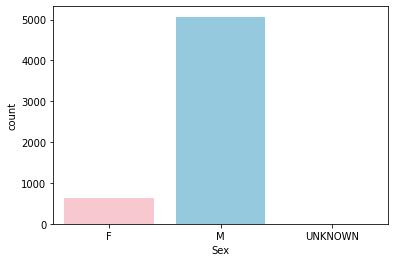

In [607]:
import seaborn as sns
sns.countplot(x="Sex", data=shark_attacks_new, palette= ('pink','skyblue'))


#### As we can see, Female representation is very small compared to mens.

In [608]:
#I would like to know fatal attacks on women vs men
shark_attacks_new[shark_attacks_new["Sex"]=="F"]["Fatal (Y/N)"].value_counts()

N          468
Y          106
UNKNOWN      4
Name: Fatal (Y/N), dtype: int64

In [609]:
shark_attacks_new[shark_attacks_new["Sex"]=="M"]["Fatal (Y/N)"].value_counts()

N          3460
Y          1169
UNKNOWN      37
Name: Fatal (Y/N), dtype: int64

In [610]:
#In order to work with these values, we need to create a new data frame

df_f= shark_attacks_new.drop(shark_attacks_new[shark_attacks_new["Sex"] != "F"].index)
df_f.head(5)
df_m= shark_attacks_new.drop(shark_attacks_new[shark_attacks_new["Sex"] != "M"].index)
df_m.head(5)

df_fandm=pd.concat([df_f,df_m])
df_fandm

# Now we compare f and m and see whether its Fatal (Y/N), by using a crosstab()
pd.crosstab(index=df_fandm["Fatal (Y/N)"], columns=df_fandm["Sex"])

Sex,F,M
Fatal (Y/N),,
N,468,3460
UNKNOWN,4,37
Y,106,1169


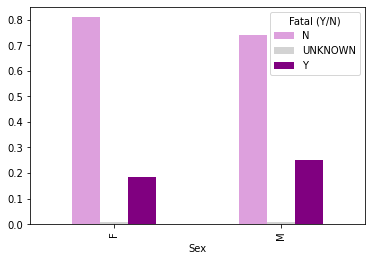

In [611]:
plot = pd.crosstab(index=df_fandm["Sex"],columns=df_fandm["Fatal (Y/N)"]).apply(lambda x: x/x.sum(), axis=1).plot(kind="bar",color= ('plum','lightgrey','purple'))

#### Females die less from shark attacks than men

In [615]:
#Activity wich causes most of the attacks in women vs men
shark_attacks_new[shark_attacks_new["Sex"]=="F"]["Activity"].value_counts().head(5)

Swimming      154
Surfing        55
Wading         54
Snorkeling     42
Standing       28
Name: Activity, dtype: int64

In [613]:
shark_attacks_new[shark_attacks_new["Sex"]=="M"]["Activity"].value_counts().head(5)

Surfing         884
Swimming        688
Fishing         330
Spearfishing    311
Bathing         138
Name: Activity, dtype: int64

([<matplotlib.axis.XTick at 0x7f52fc6dc850>,
 [Text(0, 0, 'Surfing'), Text(1, 0, 'Swimming'), Text(2, 0, 'Fishing')])

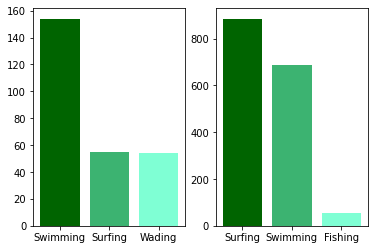

In [614]:
D_F = {'Swimming':154, 'Surfing': 55, 'Wading':54}
D_M = {'Surfing': 885,'Swimming':688, 'Fishing':54}


plt.subplot(1,2,1) # (nrows, ncols, index)
plt.bar(range(len(D_F)), list(D_F.values()), align='center', color= ('darkgreen','mediumseagreen','aquamarine'))
plt.xticks(range(len(D_F)), list(D_F.keys()))

plt.subplot(1,2,2)
plt.bar(range(len(D_M)), list(D_M.values()), align='center',color= ('darkgreen','mediumseagreen','aquamarine'))
plt.xticks(range(len(D_M)), list(D_M.keys()))

#### We can see how the activities vary a lot from f to m. Women get attacked mostly while swimming while men get attacked when surfing

In [635]:
#Now I will check, in wih country women are attacked the most
#Activity wich causes most of the attacks in women vs men
shark_attacks_new[shark_attacks_new["Sex"]=="F"]["Country"].value_counts().head(5)

USA             337
AUSTRALIA        88
SOUTH AFRICA     26
BAHAMAS          15
NEW ZEALAND      13
Name: Country, dtype: int64

In [617]:
shark_attacks_new[shark_attacks_new["Sex"]=="M"]["Country"].value_counts().head(5)

USA                 1783
AUSTRALIA           1102
SOUTH AFRICA         489
PAPUA NEW GUINEA     108
NEW ZEALAND           99
Name: Country, dtype: int64

([<matplotlib.axis.XTick at 0x7f52fda26070>,
 [Text(0, 0, 'USA'), Text(1, 0, 'AUSTRALIA'), Text(2, 0, 'SOUTH AFRICA')])

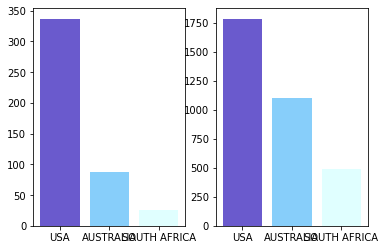

In [634]:
Dc_F = {'USA':337, 'AUSTRALIA': 88, 'SOUTH AFRICA':26}
Dc_M = {'USA': 1783,'AUSTRALIA':1102, 'SOUTH AFRICA':489}


plt.subplot(1,2,1) # (nrows, ncols, index)
plt.bar(range(len(Dc_F)), list(Dc_F.values()), align='center', color= ('slateblue','lightskyblue','lightcyan'))
plt.xticks(range(len(Dc_F)), list(Dc_F.keys()))

plt.subplot(1,2,2)
plt.bar(range(len(Dc_M)), list(Dc_M.values()), align='center',color= ('slateblue','lightskyblue','lightcyan'))
plt.xticks(range(len(Dc_M)), list(Dc_M.keys()))

#### The gap, between attacks in different countries in women is bigger than in men, this could be due to the fact that men get attacked mostly when surfing while women when swimming, we could supose that this means that women swim more in USA than in Australia